<a href="https://colab.research.google.com/github/Hajinjing/jjing/blob/master/exam09_principle_of_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class add_graph:
  def __init__(self):
    pass
  
  def forward(self, x, y):
    out = x + y
    return out
  def backward(self, dout):
    dx = 1 * dout  #x+y를 x에 대해 미분하면 1
    dy = 1 * dout
    return dx, dy


In [9]:
class mul_graph:
  def __init__(self):
    self.x=None    #변수 생성
    self.y=None

  def forward(self, x, y):
    self.x = x
    self.y = y    #객체변수라 여기서 저장해줌
    out = x * y
    return out

  def backward(self, dout):
    dx = self.y * dout
    dy = self.x * dout
    return dx, dy

  #각각의 그래프에 곱하기, 더하기에 대한 미분 값만 남겨놓으면 체인룰에 의해서 계산그래프에 대한 미분값만 남게 된다. 
  

In [10]:
class mse_graph:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None
    self.x = None

  def forward(self, y, t):
    self.t = t
    self.y = y
    self.loss = np.square(self.t - self.y).sum() / self.t.shape[0]  #에러를 제곱해서 평균
    return self.loss

  def backward(self, x, dout=1):
    data_size = self.t.shape[0]
    dweight_mse = ((self.y-self.t)*x).sum()*2/data_size  #커널에 대한 미분 mse미분
    dbias_mse = (self.y-self.t).sum()*2/data_size
    return dweight_mse, dbias_mse
  

In [23]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [18]:
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [24]:
apple_price = mul_apple_graph.forward(apple, apple_num)
orange_price = mul_orange_graph.forward(orange, orange_num)
all_price = add_apple_orange_graph.forward(apple_price, orange_price)
total_price = mul_tax_graph.forward(all_price, tax)

print(total_price)

715.0000000000001


In [20]:
dprice = 1   #맨 끝단에 줄 미분값 임의 설정..?

dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
dapple, dapple_num = mul_apple_graph.backward(dapple_price)
print('dApple',dapple)
print('dApple_num', dapple_num)
print('dOrange',dorange)
print('dOrange_num', dorange_num)
#각각의 노드들이 1씩 증가할때마다 결과값이 얼마나 증가하는지 알 수 있음

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [26]:
def celsius_to_fahrenheit(x):
    return x * 1.8 + 32

In [27]:
data_C = np.array(range(100))
data_F = celsius_to_fahrenheit(data_C)
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100


In [34]:
weight = np.random.uniform(0,5,1)
print(weight)
bias = 0

[0.43255793]


In [50]:
weight_graph = mul_graph()
bias_graph = add_graph()

In [49]:
weighted_data = weight_graph.forward(
    weight, scaled_data_C)

predict_data = bias_graph.forward(weighted_data, bias) #y를

print(predict_data)

[0.         0.00432558 0.00865116 0.01297674 0.01730232 0.0216279
 0.02595348 0.03027906 0.03460463 0.03893021 0.04325579 0.04758137
 0.05190695 0.05623253 0.06055811 0.06488369 0.06920927 0.07353485
 0.07786043 0.08218601 0.08651159 0.09083717 0.09516274 0.09948832
 0.1038139  0.10813948 0.11246506 0.11679064 0.12111622 0.1254418
 0.12976738 0.13409296 0.13841854 0.14274412 0.1470697  0.15139528
 0.15572085 0.16004643 0.16437201 0.16869759 0.17302317 0.17734875
 0.18167433 0.18599991 0.19032549 0.19465107 0.19897665 0.20330223
 0.20762781 0.21195339 0.21627897 0.22060454 0.22493012 0.2292557
 0.23358128 0.23790686 0.24223244 0.24655802 0.2508836  0.25520918
 0.25953476 0.26386034 0.26818592 0.2725115  0.27683708 0.28116265
 0.28548823 0.28981381 0.29413939 0.29846497 0.30279055 0.30711613
 0.31144171 0.31576729 0.32009287 0.32441845 0.32874403 0.33306961
 0.33739519 0.34172076 0.34604634 0.35037192 0.3546975  0.35902308
 0.36334866 0.36767424 0.37199982 0.3763254  0.38065098 0.3849765

In [48]:
dout = 1
dbias, dbiased_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(
    dbiased_data)

print(dbias)
print(dweight)  #x가 100개라서 

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [47]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data,scaled_data_F)
print(mse)


1.1495865951089919


In [46]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C) #기울기

print(weight_mse_gradient)
print(bias_mse_gradient)

-1.2147992072833065
-1.993767649170814


In [45]:
#발산을 막아주기 위한 learning_rate

learning_rate = 0.1
learned_weight = weight - learning_rate * weight_mse_gradient*np.average(dweight)
print('before learning weight:', weight)
print('after learning weight:', learned_weight)

before learning weight: [0.43255793]
after learning weight: [0.49269049]


In [51]:
learned_bias = bias - learning_rate * bias_mse_gradient*dbias
print('before learning bias : ', bias)
print('after learning bias:', learned_bias)

before learning bias :  0
after learning bias: 0.19937676491708142


In [67]:
learning_rate = 0.1
dout = 1
bias = 0
mseGraph = mse_graph()
error_list=[]
for i in range(1000):
  #forward를 이용해서 계산
  weighted_data = weight_graph.forward(
    weight, scaled_data_C)
  predict_data = bias_graph.forward(weighted_data, bias) #y를
  #backward(미분값)
  
  dbias, dbiased_data = bias_graph.backward(dout)
  dweight, dscaled_data_C = weight_graph.backward(
    dbiased_data)
  #mse
  mse = mseGraph.forward(predict_data,scaled_data_F)
  error_list.append(mse)
  weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
  #learning , 바로 수정할거라 learned_weight가 아니라 그냥 weight
  weight = weight - learning_rate * weight_mse_gradient*np.average(dweight)
  bias = bias - learning_rate * bias_mse_gradient*dbias

print(weight)
print(bias)

[1.80004608]
0.31997632102818213


In [69]:
print(error_list[-1])


1.8034480900835142e-10


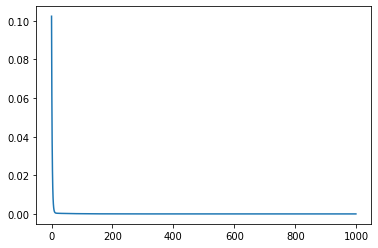

In [68]:
plt.plot(error_list)
plt.show()